<a href="https://colab.research.google.com/github/elliotgunn/DS-Unit-2-Applied-Modeling/blob/master/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [x] Determine whether your problem is regression or classification.
- [x] Choose your evaluation metric.
- [x] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [x] Begin to clean and explore your data.
- [x] Choose which features, if any, to exclude. Would some features "leak" information from the future? **No**

## Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [0]:
pip install category_encoders eli5 scipy pdpbox

     |████████████████████████████████| 57.7MB 441kB/s eta 0:00:011   |▊                               | 1.3MB 1.2MB/s eta 0:00:47     |████████████████████▋           | 37.1MB 10.6MB/s eta 0:00:02     |█████████████████████▏          | 38.1MB 10.6MB/s eta 0:00:02     |███████████████████████████████▉| 57.4MB 6.2MB/s eta 0:00:01
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=60fe40bf77d2ba6c80a0772f1fe921dbd01c0bd33c8e0e929cf4b081daf300f3
  Stored in directory: /Users/elliotgunn/Library/Caches/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
Note: you may need to restart the kernel to use updated packages.


In [0]:
# see installed packages
import sys
sys.path

['/Users/elliotgunn/Desktop/Predictive Project',
 '//anaconda3/lib/python37.zip',
 '//anaconda3/lib/python3.7',
 '//anaconda3/lib/python3.7/lib-dynload',
 '',
 '//anaconda3/lib/python3.7/site-packages',
 '//anaconda3/lib/python3.7/site-packages/aeosa',
 '//anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/elliotgunn/.ipython']

In [0]:
# the python path and the executable used by the notebook must match for package installation
!type python


python is //anaconda3/bin/python


In [0]:
sys.executable


'//anaconda3/bin/python'

In [0]:
# update all packages
# conda update --all

## Research

https://www.sciencedirect.com/science/article/pii/S0968090X18311021

https://academic.oup.com/tse/advance-article/doi/10.1093/tse/tdy001/5306170

## Import multiple files from directory and `concat` into single df

Example: 

https://stackoverflow.com/questions/20908018/import-multiple-excel-files-into-python-pandas-and-concatenate-them-into-one-dat
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe


In [0]:
# this is from 2014 - April 2017
df_2014_to_2017_url = 'https://www.toronto.ca/ext/open_data/catalog/data_set_files/Subway%20&%20SRT%20Logs%20(Jan01_14%20to%20April30_17).xlsx'

# TRAIN
df_2017_May_url = "https://www.toronto.ca/ext/open_data/catalog/data_set_files/Subway%20&%20SRT%20Logs%20(May%202017).xlsx"

df_2017_June_url = "https://www.toronto.ca/ext/open_data/catalog/data_set_files/SubwayDelay201706.xlsx"


# TEST
df_2019_Jan_url = "https://www.toronto.ca/ext/open_data/catalog/data_set_files/Subway_&_SRT_Logs_January_2019.xlsx"

df_2019_Feb_url = "https://www.toronto.ca/ext/open_data/catalog/data_set_files/Subway_&_SRT_Logs_February2019.xlsx"

import pandas as pd

df1 = pd.read_excel(df_2014_to_2017_url)
df2 = pd.read_excel(df_2017_May_url)
df3 = pd.read_excel(df_2017_June_url)

test1 = pd.read_excel(df_2019_Jan_url)
test2 = pd.read_excel(df_2019_Feb_url)

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(69016, 10)
(1634, 10)
(1568, 10)


Keep in mind that unlike the append() and extend() methods of Python lists, the append() method in Pandas does not modify the original object–instead it creates a new object with the combined data. It also is not a very efficient method, because it involves creation of a new index and data buffer. Thus, if you plan to do multiple append operations, it is generally better to build a list of DataFrames and pass them all at once to the concat() function. [link text](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html)



In [0]:
# in future: try to do this programmatically...

train_dfs = [df1, df2, df3]
train = pd.concat(train_dfs)

test_dfs = [test1, test2]
test = pd.concat(test_dfs)

all_dfs = train_dfs + test_dfs
all = pd.concat(all_dfs)

train.shape, test.shape, all.shape

((72218, 10), (3469, 10), (75687, 10))

## Baselines

In [0]:
# majority class baseline

all['Code'].value_counts(normalize=True)

MUSC     0.178512
TUSC     0.131357
MUPAA    0.061900
MUGD     0.053153
MUIS     0.052070
MUO      0.040020
SUDP     0.035409
MUIR     0.030335
MUI      0.026411
TUMVS    0.022527
PUMEL    0.021602
MUNCA    0.019937
EUDO     0.015709
EUBK     0.014296
SUO      0.013979
MUTO     0.011785
MUIRS    0.011125
MUPLB    0.009989
PUMST    0.009724
MUDD     0.009513
TUOS     0.008641
PUSTS    0.008060
MRTO     0.007571
SUUT     0.007505
PUSI     0.007386
SUAP     0.007214
EUSC     0.007069
TUO      0.006619
PUSNT    0.006183
EUNT     0.005866
           ...   
PUTTP    0.000053
ERVE     0.000040
PUEO     0.000040
PRSW     0.000040
XXXXX    0.000040
SRAE     0.000040
MTUI     0.000040
PUSAC    0.000026
EUCH     0.000026
ERRA     0.000026
SRSA     0.000026
MUCSA    0.000026
PUSEA    0.000026
MUEC     0.000026
ERLT     0.000026
SFO      0.000026
SFAP     0.000013
SRBT     0.000013
MTO      0.000013
TRDOE    0.000013
SFAE     0.000013
ETCA     0.000013
SRSP     0.000013
MUPF     0.000013
PUATC    0

In [0]:
# majority: MUSC     0.178512

majority_class = all['Code'].mode()[0]
pred = [majority_class] * len(all['Code'])

# use metric: accuracy for classification
from sklearn.metrics import accuracy_score
accuracy_score(all['Code'], pred)

0.1785115013146247

## Choose your target. Which column in your tabular dataset will you predict?

1. Predict delay time:  `Min Time` (Regression)
2. Predict delay class:  `Code` (Classification)


## Feature engineering approaches:

> But Stockholmståg has found a way to use that data to also predict the ripple effect a single delay has on its entire system. An accident somewhere along its route means a train will be delayed before it rolls into the next station. But that also affects the train behind it, and the train behind it, and so forth. Eventually a single incident can throw off the scheduling of an entire commuter system, even if the original source of the disruption has already been resolved. [link](https://gizmodo.com/a-new-algorithm-can-predict-subway-delays-two-hours-bef-1729539784)



## Wrangle + train/val/test + pipeline

In [0]:
def wrangle(X):
  
  X = X.copy()
  
  # drop 'Code' values with less than 1 in a class
  X = X[X.groupby('Code').Day.transform(len) >1]
  
  # Convert 'Date' to datetime
  X['Date'] = pd.to_datetime(X['Date'], infer_datetime_format=True)
  
  # Extract components from 'Date', then drop original column
  X['year'] = X['Date'].dt.year
  X['month'] = X['Date'].dt.month
  X['day'] = X['Date'].dt.day
  X = X.drop(columns='Date')
  
  # 'Time' is a timestamp: we have hour and minute information
  # Extract components from 'Time', then drop original column
  X['Time'] = pd.to_datetime(X['Time'], infer_datetime_format=True)
  X['hour'] = X['Time'].dt.hour
  X['minute'] = X['Time'].dt.minute
  X = X.drop(columns='Time')
  
  # Return wrangled dataframe
  return X

train = wrangle(train)
test = wrangle(test)

In [0]:
from sklearn.model_selection import train_test_split

# Split train into train & val. Make val the same size as test.
train, val = train_test_split(train, test_size=len(test),  
                              stratify=train['Code'], random_state=42)

# arrange data into X features matrix and y target vector
target = 'Code'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.4238122827346466


## Eval metric

In [0]:
# generate predicted
y_pred = pipeline.predict(X_val)

In [0]:
# print('Precision,' precision_score(y_val, y_pred))

from sklearn.metrics import precision_score, recall_score

print('Precision Score (micro): ', precision_score(y_val, y_pred, average='micro'))
print('Precision Score (macro): ', precision_score(y_val, y_pred, average='macro'))
print('Precision Score (weighted): ', precision_score(y_val, y_pred, average='weighted'))
print('')
print('Recall Score (micro): ', recall_score(y_val, y_pred, average='micro'))
print('Recall Score (macro): ', recall_score(y_val, y_pred, average='macro'))
print('Recall Score (weighted): ', recall_score(y_val, y_pred, average='weighted'))

Precision Score (micro):  0.4238122827346466
Precision Score (macro):  0.17160970923370134
Precision Score (weighted):  0.3726795602253628

Recall Score (micro):  0.4238122827346466
Recall Score (macro):  0.13043691600932608
Recall Score (weighted):  0.4238122827346466


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

        ERDB       0.00      0.00      0.00         1
        ERDO       0.15      0.17      0.16        12
        ERLV       0.00      0.00      0.00         1
       ERNEA       1.00      1.00      1.00         1
        ERNT       0.00      0.00      0.00         2
        ERPR       0.00      0.00      0.00         6
        ERTB       0.00      0.00      0.00         1
        ERTC       0.35      0.43      0.39        14
        ERTL       0.00      0.00      0.00         1
        ERWA       0.00      0.00      0.00         1
        EUAC       0.33      0.29      0.31         7
        EUAL       0.00      0.00      0.00         1
        EUBK       0.06      0.02      0.03        51
        EUBO       0.00      0.00      0.00        10
        EUCA       0.00      0.00      0.00         1
        EUCD       0.00      0.00      0.00         4
        EUCO       0.00      0.00      0.00         2
        EUDO       0.16    

## Plot the distribution of your target.
Classification: Are your classes imbalanced? Then, don't use just accuracy. And try class_balance parameter in scikit-learn.

In [0]:
%%time

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.40382387022016225
CPU times: user 1min 37s, sys: 26.1 s, total: 2min 3s
Wall time: 47.4 s


## Make exploratory visualizations


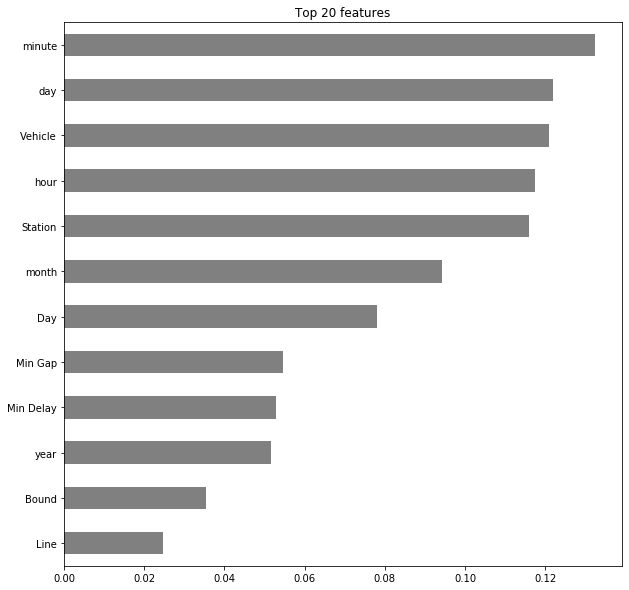

In [0]:
# feature importances

# get feature importances
rf = pipeline.named_steps['randomforestclassifier']

importances = pd.Series(rf.feature_importances_, X_train.columns)

# plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# permutation importances

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model.fit(X_train_transformed, y_train)

# this runs predict() on each feature

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)

feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1231 ± 0.0052,Vehicle
0.0805 ± 0.0000,Station
0.0671 ± 0.0078,Bound
0.0475 ± 0.0012,hour
0.0452 ± 0.0041,Min Delay
0.0361 ± 0.0014,Line
0.0316 ± 0.0012,year
0.0209 ± 0.0058,month
0.0188 ± 0.0070,Min Gap
0.0175 ± 0.0014,minute


In [0]:
# recombine features and labels for exploratory data analysis

y = train[target]
train_copy = train.copy()
train_copy['Code'] = y

In [0]:
train_copy.nunique()

Day            7
Station      275
Code         180
Min Delay    138
Min Gap      126
Bound          7
Line          37
Vehicle      898
year           4
month         12
day           31
hour          24
minute        60
dtype: int64

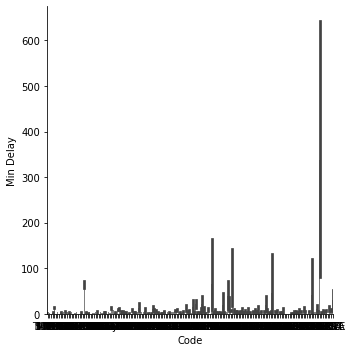

In [0]:
# categorical variables

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Code', y='Min Delay', data=train, kind='bar', color='grey')
plt.show()

## Make at least 1 partial dependence plot to explain your model

## + Make PDPs with categorical feature(s)

In [0]:
target = 'Code'
features = train.columns.drop(['Code'])

# Use ordinal
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

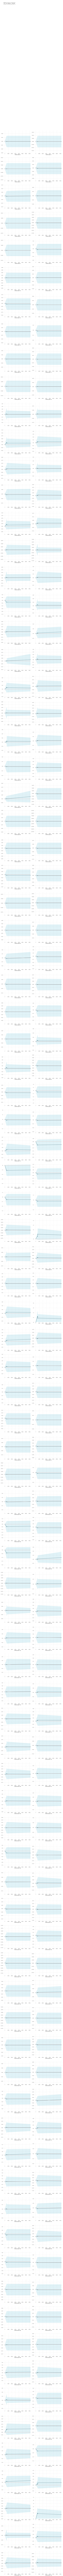

In [0]:

# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'Vehicle'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [0]:
features = ['Station', 'Min Delay']

from pdpbox.pdp import pdp_interact, pdp_interact_plot

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

KeyboardInterrupt: 